In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
interval = np.linspace(-5, 11.323)

**Problem 1** 15pts: 
    
1a) 3pts - In NumPy, create an array of points between $-5$ and $11.323$ with spacing $.0285$.  If you can not do this exactly, how close can you get?  

1b) 3pts - Using vectorization, plot $f(x) = 3x^{4} + 3x^{2} + 2$ for $-5\leq x \leq 11.323$.  Make sure your graph is labeled.   
1c) 3pts - Using vectorization in Python, find the sum 

$$
\sum_{j=0}^{n}(4j^{3} + 3j^{2} + 2)
$$

for $n=30,50$.

1d) 3pts - For the integers less than 10,000, what is the sum of those numbers which are divisible by 7, 13, or 18?  

1e) 3pts - For the recurrence relation

$$
p_{n} = 3p_{n-4} - 2p_{n-3} + 3p_{n-1}, ~ n\geq 4, 
$$

where 

$$
p_{0}= .1, ~ p_{1}=2.1, ~ p_{2} = .235, ~ p_{3} = 0,
$$

what is $p_{n}$ for $n=5$, $10$, and $20$?

In [4]:
### _Answer to Problem 1_
#a 
xvals = np.arange(-5, 11.323, .0285)
xvals2 = np.linspace(-5, 11.323, 573)
print("using np.arange for spacing")
print(xvals)

print("using np.linspace to get exact number of points")
print(xvals2)

using np.arange for spacing
[-5.     -4.9715 -4.943  -4.9145 -4.886  -4.8575 -4.829  -4.8005 -4.772
 -4.7435 -4.715  -4.6865 -4.658  -4.6295 -4.601  -4.5725 -4.544  -4.5155
 -4.487  -4.4585 -4.43   -4.4015 -4.373  -4.3445 -4.316  -4.2875 -4.259
 -4.2305 -4.202  -4.1735 -4.145  -4.1165 -4.088  -4.0595 -4.031  -4.0025
 -3.974  -3.9455 -3.917  -3.8885 -3.86   -3.8315 -3.803  -3.7745 -3.746
 -3.7175 -3.689  -3.6605 -3.632  -3.6035 -3.575  -3.5465 -3.518  -3.4895
 -3.461  -3.4325 -3.404  -3.3755 -3.347  -3.3185 -3.29   -3.2615 -3.233
 -3.2045 -3.176  -3.1475 -3.119  -3.0905 -3.062  -3.0335 -3.005  -2.9765
 -2.948  -2.9195 -2.891  -2.8625 -2.834  -2.8055 -2.777  -2.7485 -2.72
 -2.6915 -2.663  -2.6345 -2.606  -2.5775 -2.549  -2.5205 -2.492  -2.4635
 -2.435  -2.4065 -2.378  -2.3495 -2.321  -2.2925 -2.264  -2.2355 -2.207
 -2.1785 -2.15   -2.1215 -2.093  -2.0645 -2.036  -2.0075 -1.979  -1.9505
 -1.922  -1.8935 -1.865  -1.8365 -1.808  -1.7795 -1.751  -1.7225 -1.694
 -1.6655 -1.637  -1.6085 -1.58 

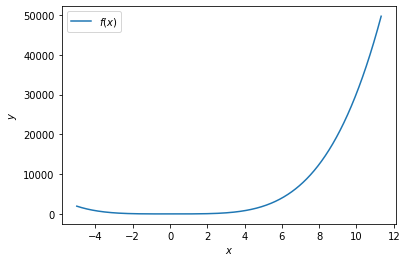

In [5]:
#b
yvals = 3*(xvals2**4) + 3*(xvals2**2) + 2
plt.plot(xvals2, yvals, label = "$f(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

In [21]:
#c
def sum_vec(n):
    jvals = np.linspace(0, int(n)+1, int(1e4))
    jcb = jvals**3
    jsq = jvals**2
    tot = np.sum(4*jcb + 3*jsq + 2)
    return tot
print(sum_vec(30))
print(sum_vec(50))

307570274.5274528
1352673964.8964894


In [7]:
#d
tot2 = 0
for jj in range(10000):
    if jj%7 == 0 or jj%13 == 0 or jj%18 == 0:
        tot2 += jj
print(tot2)

12647598


In [33]:
#e
def rec_func(n):
    if n >= 4:
        p0 = .1
        p1 = 2.1
        p2 = .235
        p3 = 0
        for jj in range(int(n)-1):
            p4 = 3*p0 - 2*p1 + 3*p3
            p0 = p1
            p1 = p2
            p2 = p3
            p3 = p4
        return p4
print(rec_func(5))
print(rec_func(10))
print(rec_func(20))

-42.915000000000006
-8931.960000000001
-356220270.43500006


**Problem 2**: 15pts - Given the function

$$
y(x) = \sum_{l=0}^{\infty} \frac{(-1)^{l}x^{2l}}{3^{l}l!}
$$

2a) 6pts - Determine a recurrence relation between the coefficients.

2b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.  

2c) 3pts - Plot this function on the interval $[0,5]$ for tolerances $10^{-6}$ and $10^{-8}$.  Comment on any phenomena you see.  Make sure graphs are labeled, have a legend, and are well sized.  

 _Answer to Problem 2_
a)
$$
a_{l} = \frac{-1^{l}x^{2l}}{3^{l}l!} \\
$$

$$
\begin{align}
a_{l - 1} = & \frac{-1^{l-1}x^{2(l-1)}}{3^{l-1}(l-1)!} \\ 
= & \frac{-1^{l}-1^{-1}x^{2l}x^{-2}}{3^{l}3^{-1}(l-1)!} \\
= & \frac{3(-1^{l})x^{2l}}{-1(3^{l})x^{2}(l-1)!} \\
a_{l - 1} = & \frac{3(-1^{l})x^{2l}}{-3^{l}x^{2}(l-1)!}.
\end{align}
$$


$$
\begin{align}
\frac{a_{l}}{a_{l-1}} = & \frac{-1^{l}x^{2l}}{3^{l}l!} * \frac{-1(3^{l})x^{2}(l-1)!}{3(-1^{l})x^{2l}} \\
= & \frac{-x^{2}(l-1)!}{3l(l-1)!} \\
\frac{a_{l}}{a_{l-1}} = & \frac{-x^{2}}{3l}.
\end{align}
$$

In [9]:
#b
def rec_func_vec(x, tol):
    Tn = np.ones(x.size)
    al = np.ones(x.size)
    ll = 1
    while np.max(np.abs(al)) >= tol:
        al *= (-x**2)/(3*ll)
        Tn += al
        ll += 1
    return Tn

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


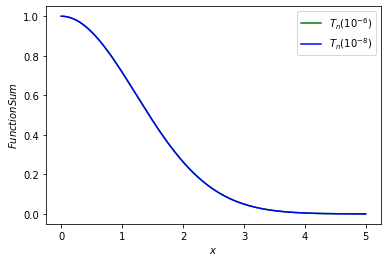

In [10]:
#c
xvals = np.linspace(0, 5, 1e4)
yvals1 = rec_func_vec(xvals, 1e-6)
yvals2 = rec_func_vec(xvals, 1e-8)

plt.plot(xvals, yvals1, color = 'g', label = "$T_{n}(10^{-6})$")
plt.plot(xvals, yvals2, color = 'b', label = "$T_{n}(10^{-8})$")

plt.xlabel("$x$")
plt.ylabel("$Function Sum$")
plt.legend()

2c comments: It seems that the plots look extremely similar between both tolerance values. It also seems that the sum converges as $x$ approaches infinity.

**Problem 3**: 15pts - Write a program (7pts) that generates the iterative sequence
$$
\phi_{n} = a\phi_{n-1} + b\phi_{n-2}, ~ n\geq 2, ~ a,b\in \mathbb{R}.
$$
Your program must take $a$, $b$, $\phi_{0}$, $\phi_{1}$, and the maximum value of $N$ as input, i.e. your program should produce a plot of the sequence for $0\leq n \leq N$.  (4pts) Generate labeled semi-log plots of $|\phi_{n}|$ up to $N=40$ for the parameter values 

* $a = 1$, $b = 3$, $\phi_{0}=1$, $\phi_{1}=2$,
* $a = -3$, $b = -1/2$, $\phi_{0}=2$, $\phi_{1}=1$.

Explain the behavior you see in the graphs (4pts).  In particular, find the slope of the lines in your plots in the large $N$ limit both computationally and analytically.  Hint: In order to get the analytic result, you need to use a guess for the solution of the form 
$$
\phi_{n} = \lambda^{n}.
$$
Then plug in your guess, and solve for $\lambda$.  You know, like with the Fibonacci numbers.

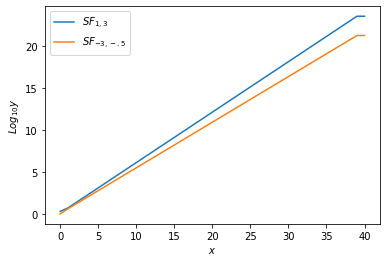

In [11]:
#_Answer to Problem 3_
def seq_func(a, b, phi0, phi1, n):
    pn = np.ones(n + 1)
    pn[0] = phi0
    pn[1] = phi1
    if n >= 2:
        for jj in range(2, n + 1):
            pn[jj] = a*pn[jj-1] + b*pn[jj-2]
            pn[jj-2] = pn[jj-1]
            pn[jj-1] = pn[jj]
    return pn

nvals = np.arange(0, 41)
yvals3 = np.log10(np.abs(seq_func(1, 3, 1, 2, 40)))
yvals4 = np.log10(np.abs(seq_func(-3, -(1/2), 2, 1, 40)))

plt.plot(nvals, yvals3, label = "$SF_{1, 3}$")
plt.plot(nvals, yvals4, label = "$SF_{-3, -.5}$")

plt.xlabel("$x$")
plt.ylabel("$Log_{10}y$")
plt.legend()

Problem 3 comments: It looks like the slope of the second set of inputs for the sequence is smaller than the first. To prove this computationally, we'll create a function that gives a rough estimate of each slope by subtracting some earlier point from the next point in the sequnce.

In [12]:
#Computational result
def seq_func_slopea(ntrunca, n):
    lphina = np.log10(seq_func(1, 3, 1, 2, 40))
    lphint3 = lphina[ntrunca:]
    nvals = np.array(range(0, n + 1))
    nvalta = nvals[ntrunca:]
    
    slope3 = (lphint3[6]-lphint3[5])
    
    print ("Computational slope of yvals3 is: %1.15f" % slope3)

In [13]:
def seq_func_slopeb(ntruncb, n):
    lphinb = np.log10(np.abs(seq_func(-3, -(1/2), 2, 1, 40)))
    lphint4 = lphinb[ntruncb:]
    nvals = np.array(range(0, n + 1))
    nvaltb = nvals[ntruncb:]
    
    slope4 = (lphint4[6]-lphint4[5])
    
    print ("Computational slope of yvals4 is: %1.15f" % slope4)

In [14]:
seq_func_slopea(1, 40)
seq_func_slopeb(1, 40)

Computational slope of yvals3 is: 0.602059991327962
Computational slope of yvals4 is: 0.544068044350276


In [15]:
def lam_plus(a, b):
    return (a + np.sqrt((a**2) + 4*b))/2

def lam_min(a, b):
    return (a - np.sqrt((a**2) + 4*b))/2

print(lam_plus(1, 3))
print(lam_min(1, 3))

print(lam_plus(-3, -.5))
print(lam_min(-3, -.5))

2.302775637731995
-1.3027756377319946
-0.17712434446770464
-2.8228756555322954


Analytical Result
$$
\phi_{n} = \lambda^{n}\\
\phi_{n} = a\phi_{n-1} + b\phi_{n-2}\\
\lambda^{n} = a\lambda^{n-1} + b\lambda^{n-2}\\
0 = \lambda^{n} - a\lambda^{n-1} - b\lambda^{n-2}.
$$

$$
\lambda_{-}^{+} = \frac{a_{-}^{+}\sqrt{a^{2}+4b}}{2} \\
\lambda_{+} = \frac{a + \sqrt{a^{2}+4b}}{2} \\
\lambda_{-} = \frac{a - \sqrt{a^{2}+4b}}{2} 
$$

We assume there are $ c_{0} $ and $ c_{1} $ such that $ \phi_{n} = c_{0}\lambda_{+}^{n} + c_{1}\lambda_{-}^{n} $
From this we get 
$$ 
\begin{align}
\phi_{0} = & c_{0} + c_{1} \\
\phi_{1} = & c_{0}\lambda_{+} + c_{1}\lambda_{-}
\end{align}
$$

We have
$$
c_{0} = \phi_{0} - c_{1} \\ 
$$

We substitute $ \phi_{0} - c_{1} $ for $ c_{0} $ in 
$$
\phi_{1} = c_{0}\lambda_{+} + c_{1}\lambda_{-} \\
$$

$$
\begin{align}
\phi_{1} = & (\phi_{0} - c_{1})\lambda_{+} + c_{1}\lambda_{-} \\
\phi_{1} = & \phi_{0}\lambda_{+} - c_{1}\lambda_{+} + c_{1}\lambda_{-} \\
\phi_{1} - \phi_{0}\lambda_{+} = & c_{1}\lambda_{-} - c_{1}\lambda_{+} \\
\phi_{1} - \phi_{0}\lambda_{+} = & c_{1}(\lambda_{-} - \lambda_{+}) \\
\frac{\phi_{1} - \phi_{0}\lambda_{+}}{\lambda_{-} - \lambda_{+}} = & c_{1} \\
\frac{-1(\phi_{0}\lambda_{+} - \phi_{1})}{-1(\lambda_{+} - \lambda_{-})} = & c_{1} \\
\frac{\phi_{0}\lambda_{+} - \phi_{1}}{\lambda_{+} - \lambda_{-}} = & c_{1} \\
\end{align}
$$


We then substitute for $ c_{1} $ into $ c_{0} = \phi_{0} - c_{1} $

$$
\begin{align}
c_{0} = & \phi_{0} - (\frac{\phi_{0}\lambda_{+} - \phi_{1}}{\lambda_{+} - \lambda_{-}}) \\
= & \frac{\phi_{0}(\lambda_{+} - \lambda_{-})}{\lambda_{+} - \lambda_{-}} - \frac{\phi_{0}\lambda_{+} - \phi_{1}}{\lambda_{+} - \lambda_{-}}\\
= & \frac{\phi_{1} - \phi_{0}\lambda_{-}}{\lambda_{+} - \lambda_{-}} \\
\end{align}
$$

In [19]:
#test for correctness of analytical result

rad13 = np.sqrt(13)
lamp = (1 + rad13)/2
lamm = (1 - rad13)/2

phi0 = (1 - 2*lamm + lamp - 2)/(lamp - lamm)
print(phi0)

1.083974852831078


**Problem 4**: 15pts -  For the integral,
$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx, 
$$
use 

* (7pts) a Taylor series to the third order (i.e. keep up to cubic terms) around $x=0$ to approximate the integral, 
* (6pts) a Taylor series to the third order chosen appropriately to approximate each integral on the right hand side of the expression

$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx = 
\int_{0}^{\pi/6}\cos(\cos(x^{2}))dx + \int_{\pi/6}^{\pi/3}\cos(\cos(x^{2}))dx + \int_{\pi/3}^{\pi/2}\cos(\cos(x^{2}))dx.
$$

* (2pts) Using NumPy, one can find that 
$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx =  1.137063808641665
$$
Find the error in each of your approximations, state which is better, and explain why it is better.  

In [16]:
#_Answer to Problem 4_
sin = np.sin
cos = np.cos
pi = np.pi
Ir = 1.137063808641665

def non_deriv(a):
    return cos(cos(a**2))

def first_deriv(a):
    return 2*a*(sin(a**2))*(sin(cos(a**2)))

def second_deriv(a):
    return 2*((sin(a**2)) + 2*(a**2)*(cos(a**2)))*(sin(cos(a**2))) - 4*(a**2)*((sin(a**2))**2)*(cos(cos(a**2)))

def third_deriv(a):
    return -12*a*((sin(a**2))**2)*(cos(cos(a**2))) + 12*a*(cos(a**2))*(sin(cos(a**2))) - 8*(a**3)*((sin(a**2))**3)*(sin(cos(a**2))) - 24*(a**3)*(sin(a**2))*(cos(a**2))*(cos(cos(a**2))) - 8*(a**3)*(sin(a**2))*(sin(cos(a**2)))

def I1a(v):
    return non_deriv(0)*v + first_deriv(0)*((v**2)/2) + second_deriv(0)*((v**3)/6) + third_deriv(0)*((v**4)/24)

print("Single Integral Approximation", I1a(pi/2))
errora = np.abs(Ir - (I1a(pi/2)))
print("Error for single integral", errora)

I1 = (pi/6)*cos(1)

def I_2(u):
    return non_deriv(pi/6)*u + first_deriv(pi/6)*((u**2)/2) + second_deriv(pi/6)*((u**3)/6) + third_deriv(pi/6)*((u**4)/24)

def I_3(w):
    return non_deriv(pi/3)*w + first_deriv(pi/3)*((w**2)/2) + second_deriv(pi/3)*((w)/6) + third_deriv(pi/3)*((w)/24)


In = I1 + (I_2(pi/2) - I_2(pi/3)) + (I_3((2*pi)/3) - I_3((5*pi)/6))
Ir = 1.137063808641665
print("Split Integral Approximation", In)
errorb = np.abs(Ir - In)
print("Error for split integral = " ,errorb)

Single Integral Approximation 0.8487048774164866
Error for single integral 0.2883589312251783
Split Integral Approximation 1.2558500968398227
Error for split integral =  0.11878628819815784


Problem 4 comments:
We would use the split integral since its margin of error is less than that of the single integral. This comes as no surprise since we integrate different focal points of the 3rd order taylor series in different bounds leading up to the ending bound.

**Problem 5**: 10pts - The $(p,q)$ hypergeometric function is defined as 
$$
_{p}F_{q}(a_{1},\cdots,a_{p};b_{1},\cdots,b_{q};x) = \sum_{n=0}^{\infty} \frac{\left(a_{1}\right)_{n}\cdots\left(a_{p}\right)_{n}}{\left(b_{1}\right)_{n}\cdots\left(b_{q}\right)_{n}}\frac{x^{n}}{n!}
$$
where $a_{j}\in \mathbb{R}$, $b_{l}\in \mathbb{R}$ and for any real value $a$ we have the recursion relationship
\begin{align*}
(a)_{0} = & 1 \\
(a)_{n} = & (a+n-1)(a)_{n-1}, ~ n\geq 1.
\end{align*}
So for example, we have that 
$$
_{0}F_{0}(;;x) = \sum_{n=0}^{\infty}\frac{1}{1}\frac{x^{n}}{n!} = e^{x}, 
$$
and if we have the Bessel function $J_{n}(x)$ where 
$$
J_{n}(x) = \sum_{m=0}^{\infty} \frac{(-1)^{m}}{m! (m+n)!}\left(\frac{x}{2} \right)^{2m + n} = \frac{1}{n!}\left(\frac{x}{2}\right)^{n}\sum_{m=0}^{\infty}\frac{1}{(n+1)_{m}}\frac{1}{m!}\left(\frac{-x^{2}}{4}\right)^{m}, 
$$
since
\begin{align*}
(m+n)! = & n!(n+1)(n+2)\cdots(n+m) \\
= &n!(n+1)(n+1 + 1)\cdots(n+1+m-1) \\
= & n!(n+1)_{m},
\end{align*}
then we have 
$$
J_{n}(x) = \frac{1}{n!}\left(\frac{x}{2}\right)^{n}  ~_{0}F_{1}\left(;n+1;-\frac{x^{2}}{4}\right).
$$

Write a program which computes the $(p,q)$ hypergeometric function.  It should take as input vectors ${\bf a}$ and ${\bf b}$ where 
\begin{align*}
{\bf a} = & (a_{1},~ a_{2},~ \cdots,~ a_{p}) \\ 
{\bf b} = & (b_{1},~ b_{2},~ \cdots,~ b_{q}) 
\end{align*}
and an evaluation point $x$.  Note, your program should determine $p$ and $q$ using the length of $a$ and $b$ respectively.  Make sure you vectorize your function.  Make sure you make efficient use of recursion.  Clearly explain the stopping criteria you choose and why you choose it.  Test your code by comparing your results to those you would get using the implementation for the Bessel functions we developed in the lectures.  

Then, using NumPy's version of the functions as the _true_ values, numerically prove the identity

$$
\sin^{-1}(x) = x \cdot _{2}F_{1}\left(\frac{1}{2},\frac{1}{2};\frac{3}{2};x^{2}\right)
$$

Generate semi-log plots of the difference of the two functions over meshes on $[-.5,.5]$ and argue why this shows the identities are true.  Note, you may need to adapt your stopping condition to adequately answer this problem.  

_Answer to Problem 5_

In [17]:
def hypgeo_func_vec(a, b):
    a = np.ones(a.size)
    b = np.ones(b.size)
    Nvals = np.array(a.size) 
    an = 1
    for nn in range(1, Nvals):
        an *= (a + nn - 1)/(b + nn)
        tot += an
        nn += 1
    return tot

Nvals = np.linspace(0., 40., int(1e4))
mvals = hypgeo_func_vec(Nvals, Nvals)

UnboundLocalError: local variable 'tot' referenced before assignment

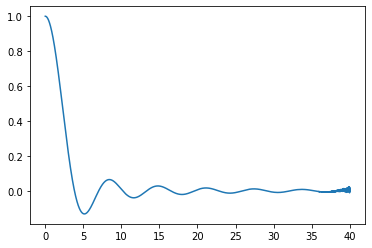

In [18]:
def bessel_func_vec(x,n,tol):
    tot = np.ones(x.size)
    am = np.ones(x.size)
    mm = 1
    while np.max(np.abs(am)) >= tol:
        am *= (-x**2)/((4*mm)*(mm + n))
        tot += am
        mm += 1
    return tot

xvals = np.linspace(0.,40.,int(1e4))
yvals = bessel_func_vec(xvals,1,1e-7)

plt.plot(xvals, yvals)